In [143]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [144]:
train = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [145]:
train.shape

(70000, 12)

In [146]:
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


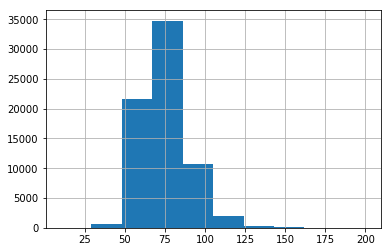

In [147]:
train['weight'].hist();

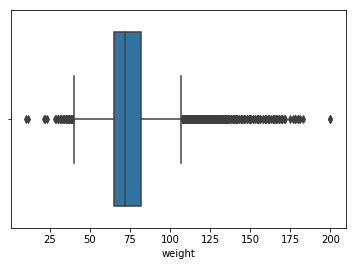

In [148]:
sns.boxplot(train['weight']);

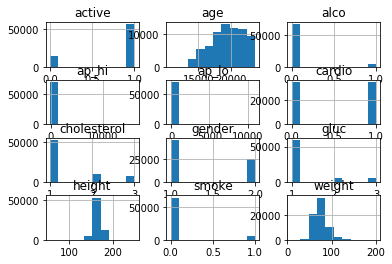

In [149]:
train.hist();

In [150]:
train['ap_hi'].value_counts().head()

120    27699
140     9506
130     8961
110     8644
150     4450
Name: ap_hi, dtype: int64

In [151]:
train['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

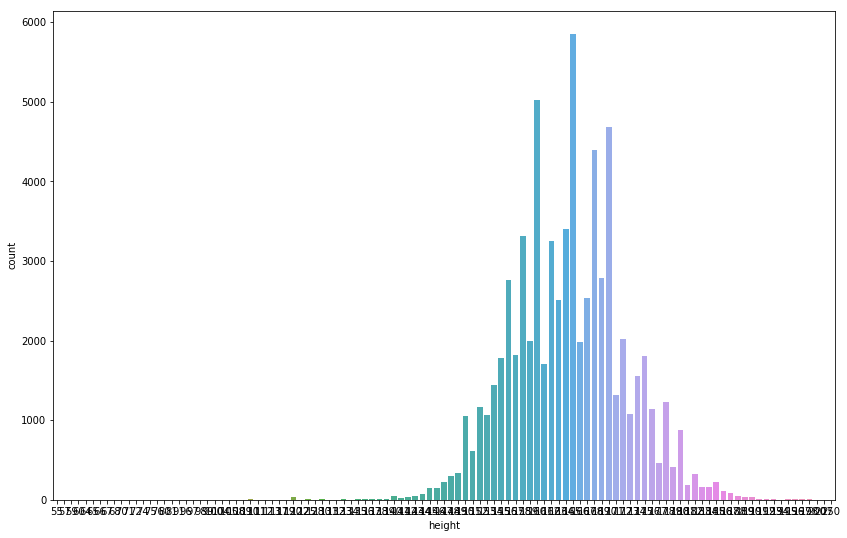

In [152]:
plt.figure(figsize=(14, 9));
sns.countplot(train['height']);

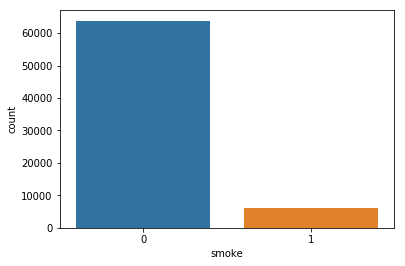

In [153]:
sns.countplot(train['smoke']);

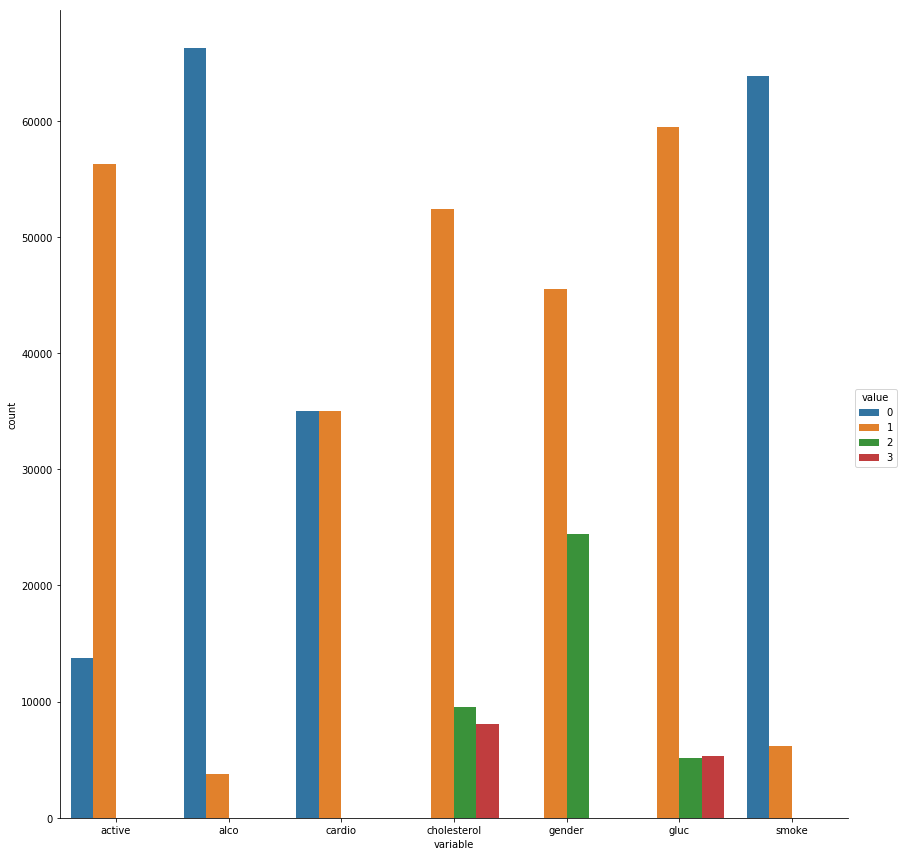

In [154]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

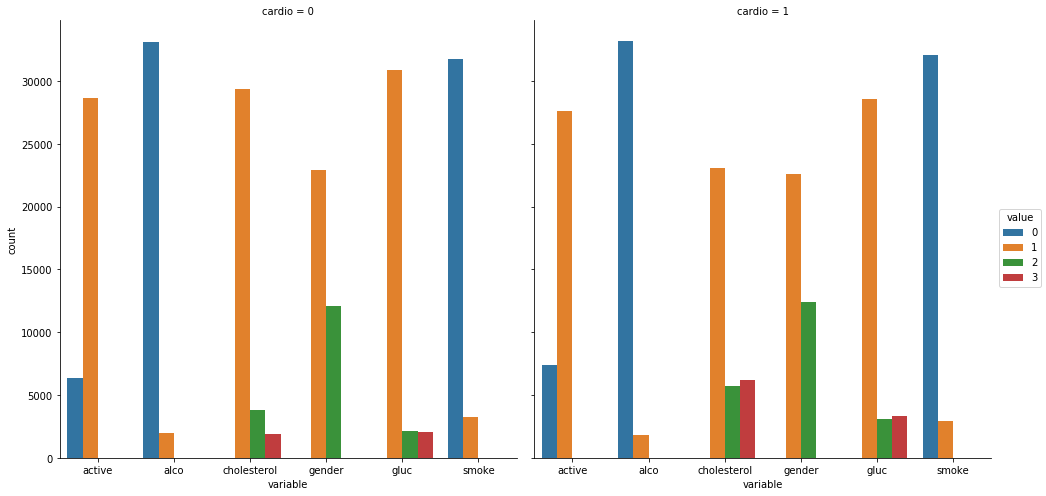

In [155]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=7);

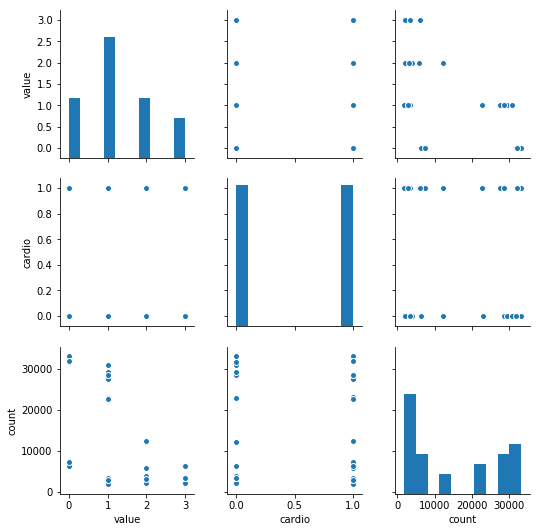

In [156]:
sns.pairplot(train_uniques);

In [157]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


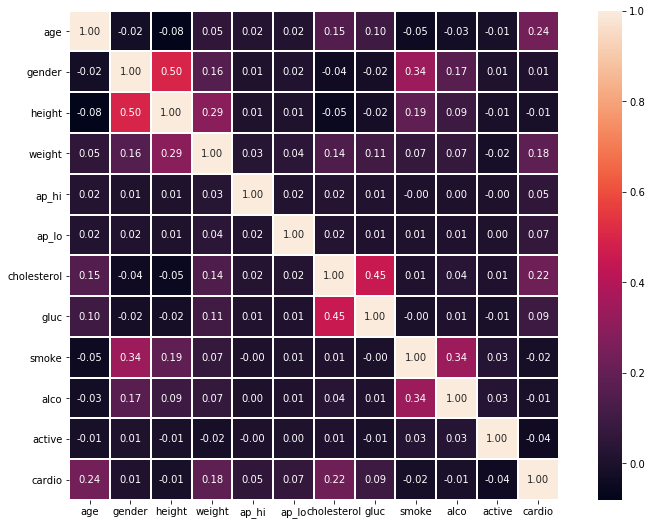

In [158]:
plt.figure(figsize=(14, 9));
sns.heatmap(train.corr(), annot=True, square=True, linewidths=1, fmt='.2f', annot_kws={'size': 10});

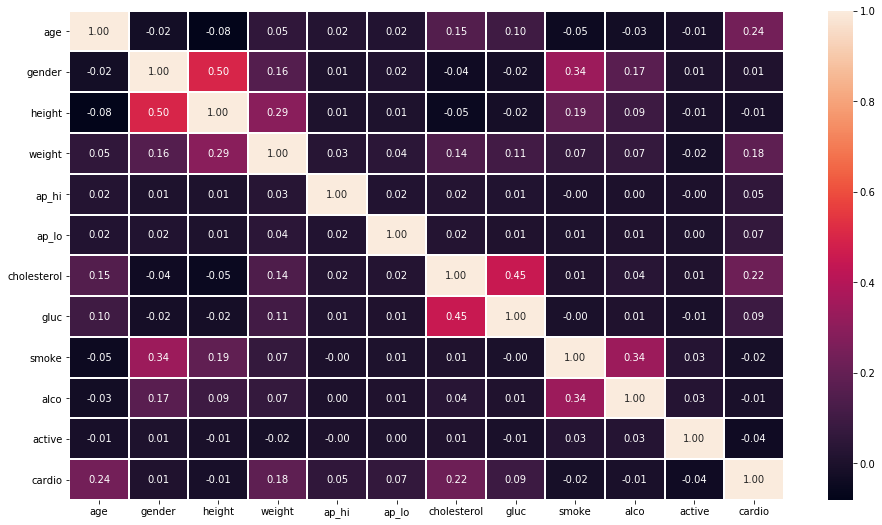

In [159]:
plt.figure(figsize=(16, 9));
sns.heatmap(train.corr(), annot=True, fmt='.2f', linewidths=1);

In [160]:
# Weight, Gender

In [161]:
train_long = pd.melt(train, value_vars='weight', id_vars='gender');

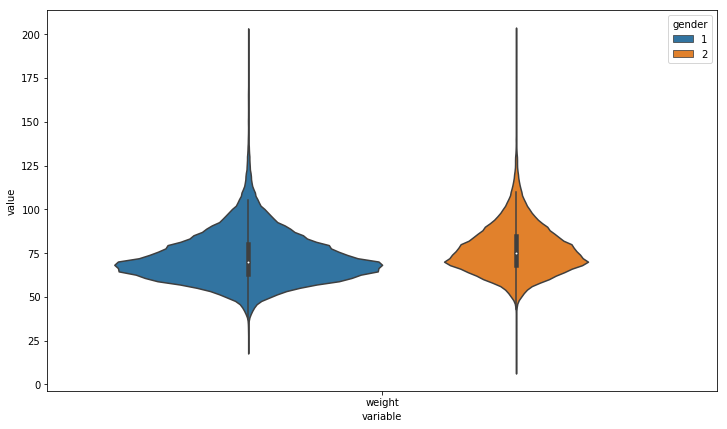

In [177]:
plt.figure(figsize=(12, 7));
sns.violinplot(x='variable', y='value', hue='gender', scale='count', data=train_long);

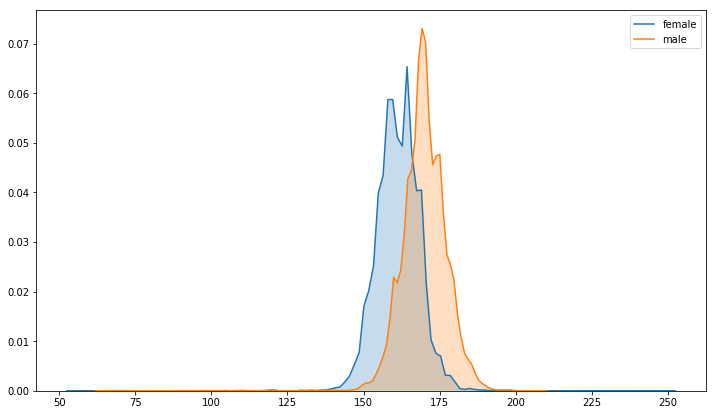

In [178]:
plt.figure(figsize=(12, 7));
sns.kdeplot(data=train[train['gender'] == 1]['height'], shade=True, label='female');
sns.kdeplot(data=train[train['gender'] == 2]['height'], shade=True, label='male');

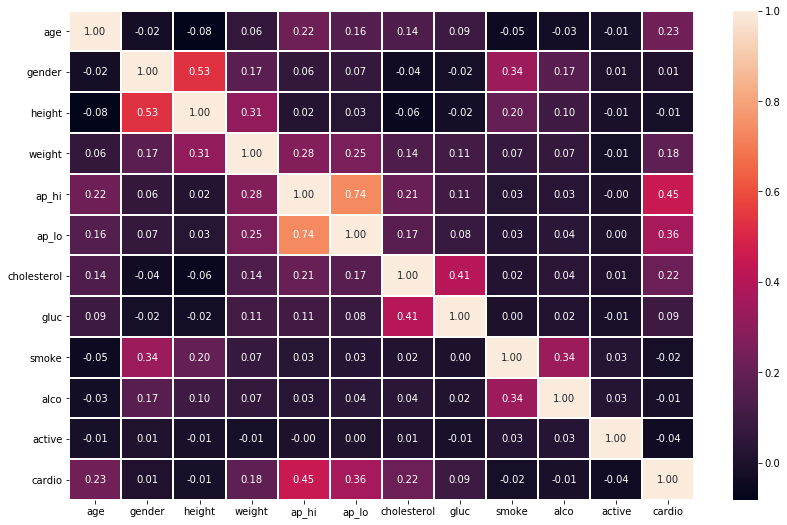

In [164]:
plt.figure(figsize=(14, 9));
sns.heatmap(train.corr(method='spearman'), annot=True, fmt='.2f', linewidths=1);

In [165]:
# Ap_hi, Ap_lo

In [166]:
train[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


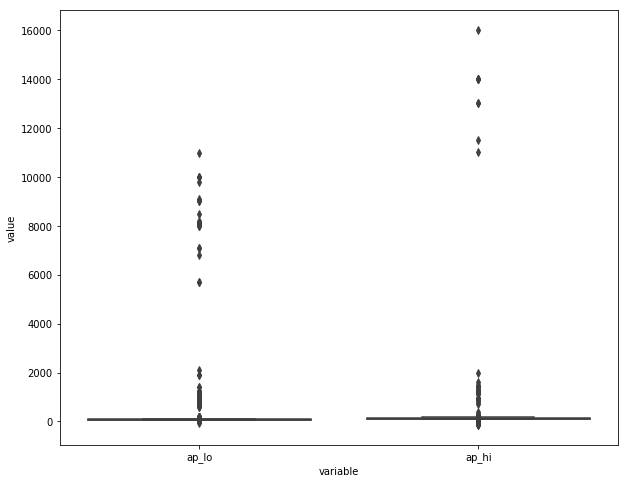

In [167]:
train_ap = pd.melt(train[['ap_lo', 'ap_hi']])
plt.figure(figsize=(10, 8));
sns.boxplot(x='variable', y='value', data=train_ap);

In [168]:
# Природа данных

In [169]:
from scipy.stats import pearsonr, spearmanr

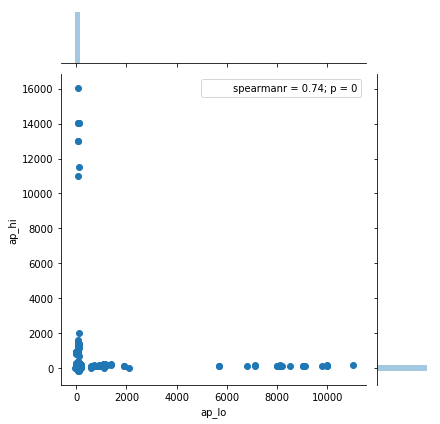

In [170]:
sns.jointplot(x='ap_lo', y='ap_hi', data=train, stat_func=spearmanr);

In [171]:
#"""Сетка"""
#g.ax_joint.grid(True) 

#"""Преобразуем логарифмические значения на шкалах в реальные"""
#g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
#g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

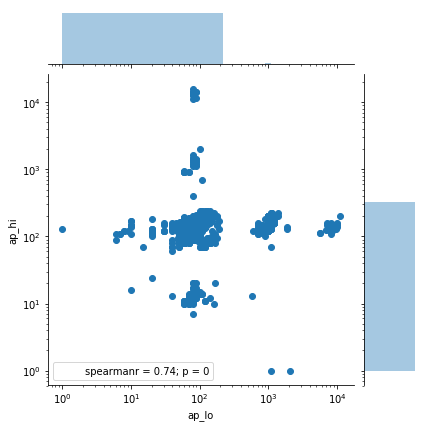

In [172]:
train_norm = train[(train['ap_lo']>0) & (train['ap_hi']>0)]
g = sns.jointplot('ap_lo', 'ap_hi', data=train_norm, stat_func=spearmanr);
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

In [173]:
# Больше трёх

In [174]:
train['age_years'] = (train['age'] // 365.25).astype(int)

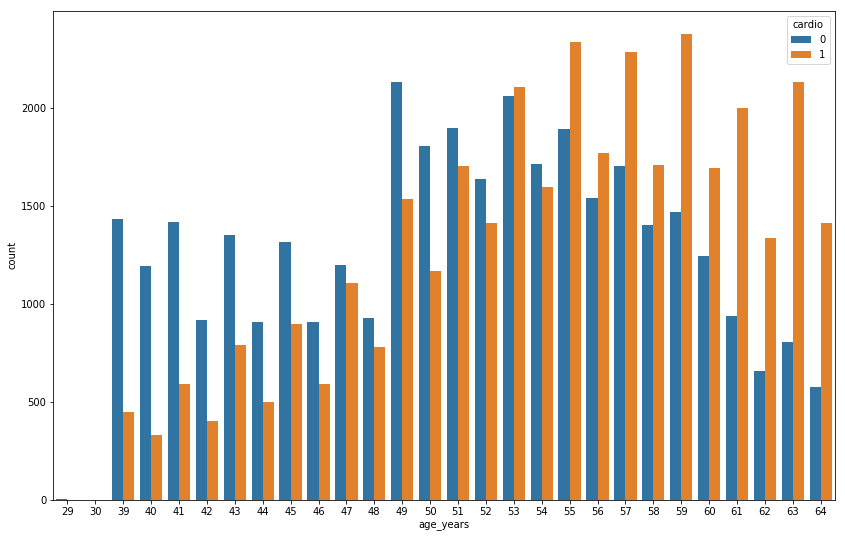

In [175]:
plt.figure(figsize=(14, 9));
sns.countplot(x='age_years', hue='cardio', data=train);

In [176]:
# 53